In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\surya\SPOTIFY-GENRE-CLUSTERING\data\spotify_dataset.csv")
print(df.head())  

   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   



--- Dataset Shape ---
(114000, 21)

--- Data Types ---
Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

--- First 5 Rows ---
   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Granni

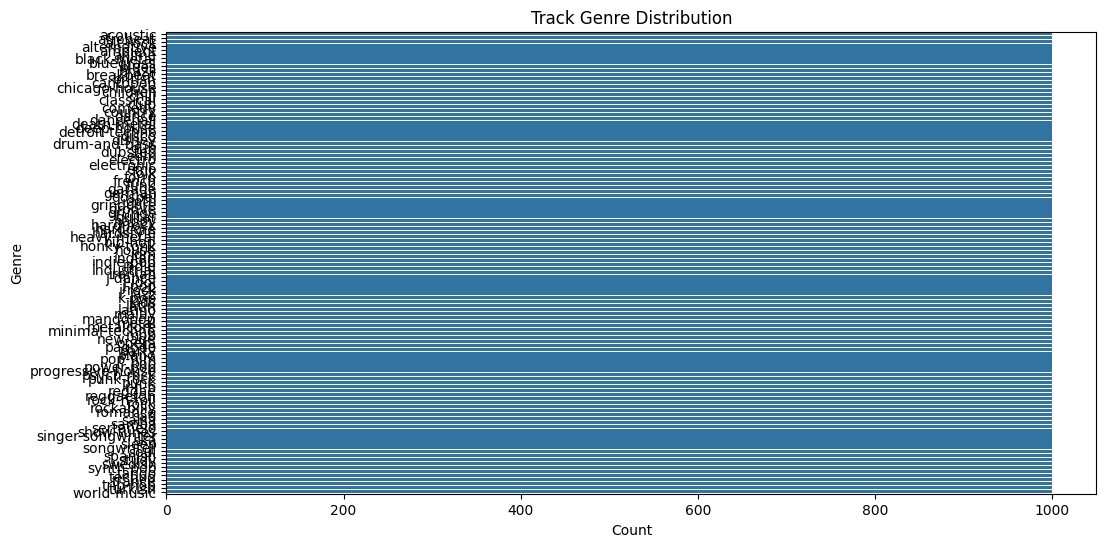

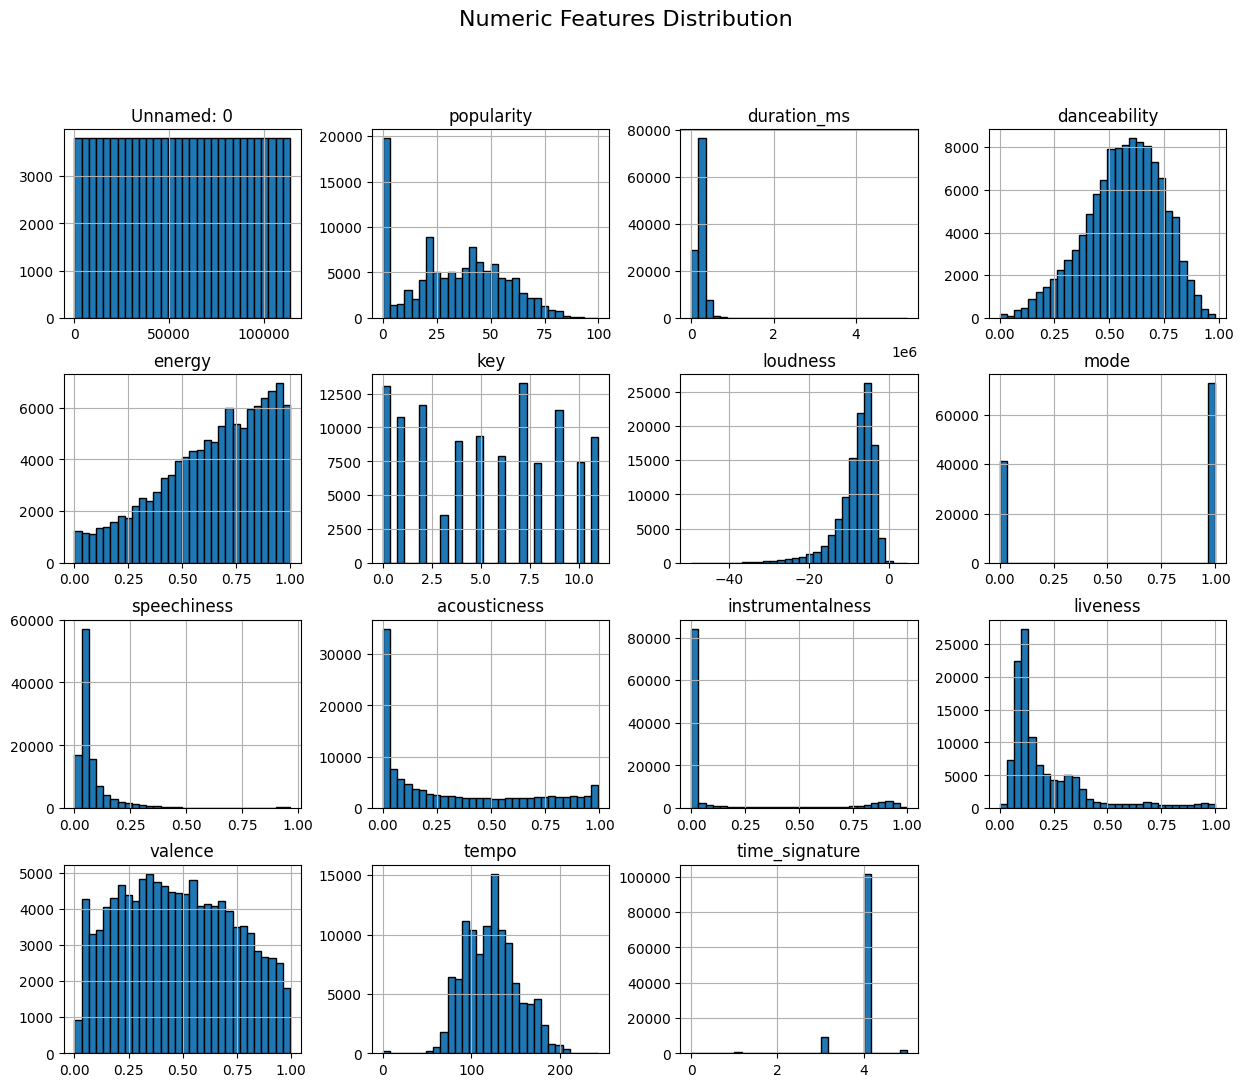

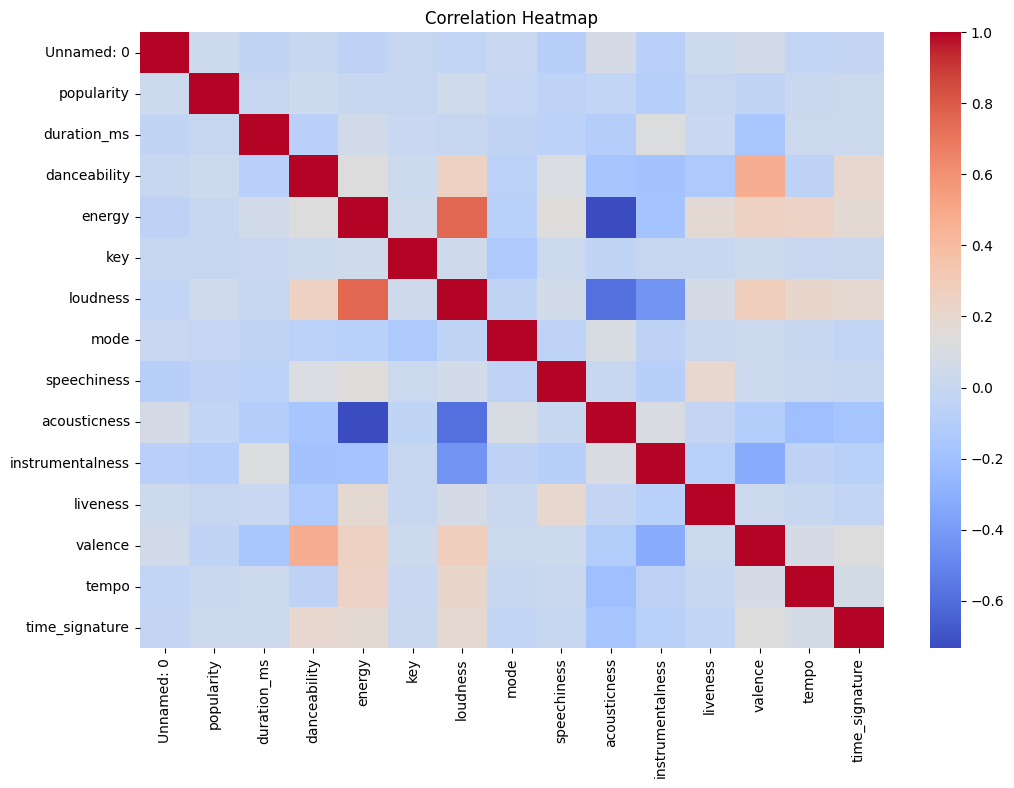

In [2]:
# Step 2: EDA for Spotify Genre Clustering

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (absolute path for now)
df = pd.read_csv(r"C:\Users\surya\SPOTIFY-GENRE-CLUSTERING\data\spotify_dataset.csv")

# =======================
# 1. Basic Information
# =======================
print("\n--- Dataset Shape ---")
print(df.shape)

print("\n--- Data Types ---")
print(df.dtypes)

print("\n--- First 5 Rows ---")
print(df.head())

# =======================
# 2. Missing Values
# =======================
print("\n--- Missing Values ---")
print(df.isnull().sum())

# =======================
# 3. Duplicate Check
# =======================
duplicates = df.duplicated().sum()
print(f"\n--- Duplicate Rows: {duplicates} ---")

# =======================
# 4. Basic Statistics
# =======================
print("\n--- Descriptive Statistics ---")
print(df.describe())

# =======================
# 5. Target Column Distribution
# =======================
plt.figure(figsize=(12, 6))
sns.countplot(y="track_genre", data=df, order=df["track_genre"].value_counts().index)
plt.title("Track Genre Distribution")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

# =======================
# 6. Numeric Feature Histograms
# =======================
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

df[numeric_cols].hist(figsize=(15, 12), bins=30, edgecolor="black")
plt.suptitle("Numeric Features Distribution", fontsize=16)
plt.show()

# =======================
# 7. Correlation Heatmap
# =======================
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv(r"C:\Users\surya\SPOTIFY-GENRE-CLUSTERING\data\spotify_dataset.csv")

# 1. Drop non-numeric & ID columns
drop_cols = ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'track_genre']
df_clean = df.drop(columns=drop_cols)

# 2. Remove obvious outliers
df_clean = df_clean[(df_clean['tempo'] > 30) & (df_clean['tempo'] < 250)]
df_clean = df_clean[(df_clean['duration_ms'] > 30000) & (df_clean['duration_ms'] < 600000)]
df_clean = df_clean[(df_clean['loudness'] > -35) & (df_clean['loudness'] < 5)]

# 3. Reset index after filtering
df_clean.reset_index(drop=True, inplace=True)

# 4. Scale numeric features to [0,1]
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)

print("--- Cleaned & Scaled Dataset Shape ---")
print(df_scaled.shape)
df_scaled.head()


--- Cleaned & Scaled Dataset Shape ---
(113038, 15)


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.73,0.351955,0.0,0.669059,0.460989,0.090909,0.714647,0.0,0.128221,0.032329,0.000001,0.352006,0.718593,0.270753,0.8
1,0.55,0.209732,0.0,0.394881,0.165983,0.090909,0.449257,1.0,0.057482,0.927711,0.000006,0.092607,0.268342,0.221835,0.8
2,0.57,0.317143,0.0,0.414159,0.358987,0.000000,0.639046,1.0,0.035635,0.210843,0.000000,0.108756,0.120603,0.216407,0.8
3,0.71,0.301539,0.0,0.229945,0.059581,0.000000,0.416871,1.0,0.015060,0.908635,0.000071,0.123896,0.143719,0.710881,0.6
4,0.82,0.296135,0.0,0.606940,0.442989,0.181818,0.640387,1.0,0.032347,0.470884,0.000000,0.074338,0.167839,0.421017,0.8


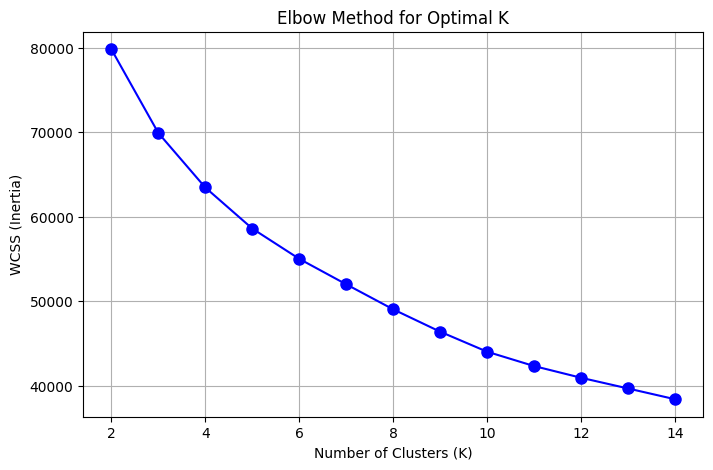

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
K_range = range(2, 15)  # Trying K from 2 to 14

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


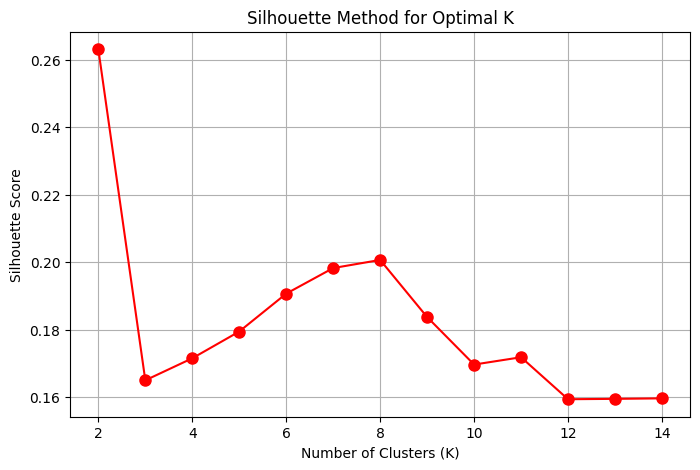

K = 2 → Silhouette Score: 0.2631
K = 3 → Silhouette Score: 0.1649
K = 4 → Silhouette Score: 0.1715
K = 5 → Silhouette Score: 0.1794
K = 6 → Silhouette Score: 0.1906
K = 7 → Silhouette Score: 0.1982
K = 8 → Silhouette Score: 0.2006
K = 9 → Silhouette Score: 0.1837
K = 10 → Silhouette Score: 0.1696
K = 11 → Silhouette Score: 0.1718
K = 12 → Silhouette Score: 0.1593
K = 13 → Silhouette Score: 0.1595
K = 14 → Silhouette Score: 0.1596


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 1. Load dataset
df = pd.read_csv(r"C:\Users\surya\SPOTIFY-GENRE-CLUSTERING\src\dashboard\spotify_dataset.csv")


# 2. Select numeric features for clustering
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = df[features]

# 3. Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)

# 4. Find optimal K using Silhouette Score
silhouette_scores = []
K_range = range(2, 15)  # Trying K from 2 to 14

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# 5. Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, 'ro-', markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal K')
plt.grid(True)
plt.show()

# 6. Print values
for k, score in zip(K_range, silhouette_scores):
    print(f"K = {k} → Silhouette Score: {score:.4f}")


In [5]:
from sklearn.cluster import KMeans

# Replace with the K you selected from previous steps
OPTIMAL_K = 6  

# Final KMeans model
kmeans_final = KMeans(n_clusters=OPTIMAL_K, random_state=42, n_init=10)
kmeans_final.fit(df_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = kmeans_final.labels_

print(f"✅ KMeans clustering complete with K = {OPTIMAL_K}")
print(df['Cluster'].value_counts())
df.head()


✅ KMeans clustering complete with K = 6
Cluster
2    40896
4    31229
3    24402
1     8211
0     8120
5     1142
Name: count, dtype: int64


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,Cluster
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,2
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,3
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,3
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,3
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,3


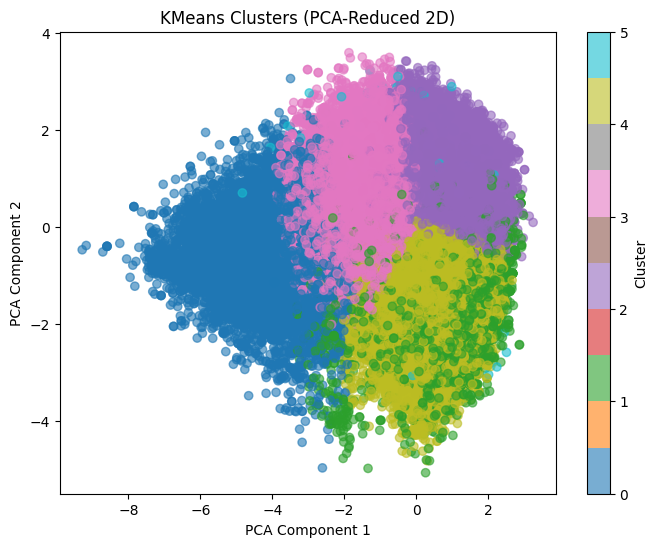

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(df_scaled)

# Add PCA results to DataFrame
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Plot clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='tab10', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clusters (PCA-Reduced 2D)')
plt.colorbar(scatter, label='Cluster')
plt.show()


--- Cluster Characteristics ---


,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
Cluster,,,,,,,,,,,
0,28.444951,0.362899,0.190990,-20.586108,0.051787,0.827319,0.787714,0.161475,0.189811,104.176427,225925.156034
1,35.193521,0.524628,0.756997,-6.959423,0.087196,0.273328,0.081754,0.727046,0.508845,124.220989,238771.417611
2,32.600059,0.696429,0.729826,-6.398282,0.091321,0.193337,0.054207,0.163369,0.689237,119.815666,216000.648768
3,34.427711,0.537925,0.384377,-10.536564,0.054385,0.668740,0.051328,0.157108,0.397339,113.612089,216985.245144
4,34.158571,0.483329,0.812242,-5.947516,0.080513,0.060505,0.231852,0.186535,0.318051,136.724894,250483.388933
5,25.561296,0.577291,0.664676,-11.126214,0.821163,0.720493,0.010756,0.633865,0.445782,102.309068,218456.077933


<Figure size 1500x600 with 0 Axes>

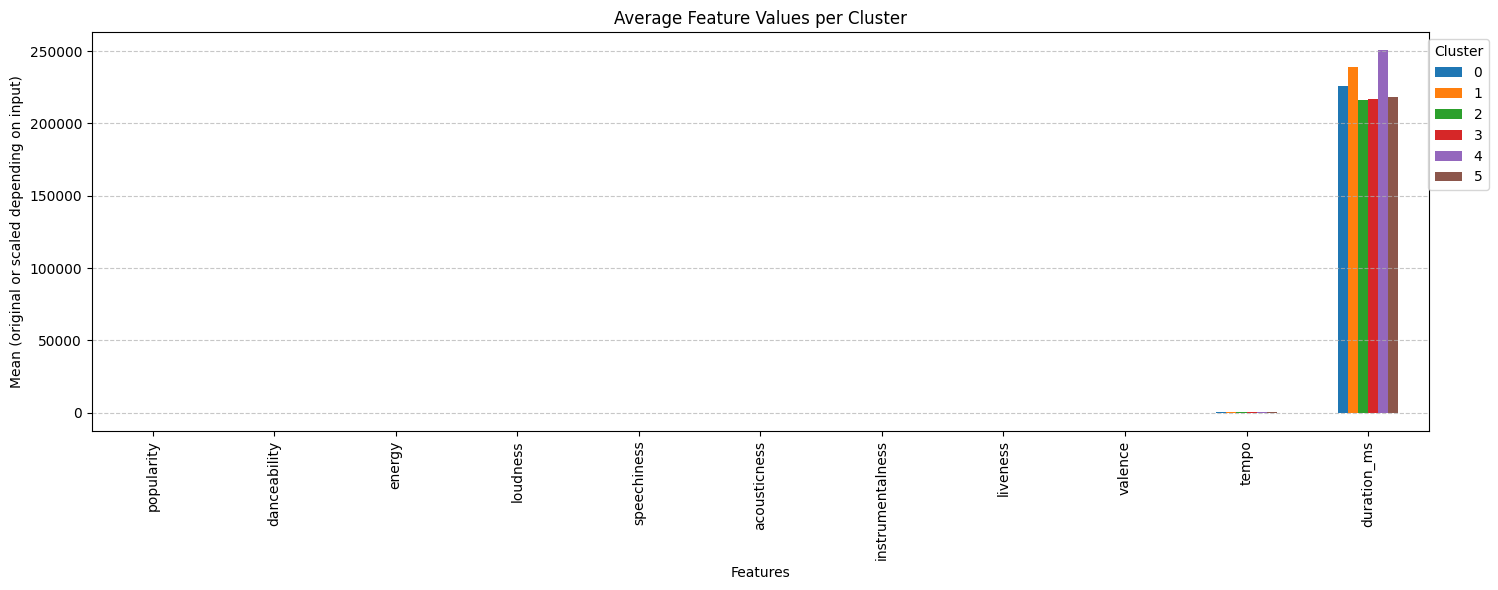

In [9]:
import matplotlib.pyplot as plt

# Make sure Cluster is int
df['Cluster'] = df['Cluster'].astype(int)

# Choose audio features you want to compare
features = ['popularity','danceability','energy','loudness',
            'speechiness','acousticness','instrumentalness',
            'liveness','valence','tempo','duration_ms']

# Keep only features that actually exist in df
features = [f for f in features if f in df.columns]

# Group by cluster and compute mean for only those features
cluster_summary = df.groupby('Cluster')[features].mean()

print("--- Cluster Characteristics ---")
display(cluster_summary)

# Plot (transpose so features on x-axis)
plt.figure(figsize=(15,6))
cluster_summary.T.plot(kind='bar', figsize=(15,6))
plt.title("Average Feature Values per Cluster")
plt.ylabel("Mean (original or scaled depending on input)")
plt.xlabel("Features")
plt.legend(title="Cluster", bbox_to_anchor=(1.05,1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [11]:
import random

# Make sure we have a copy with clusters
df_with_clusters = df.copy()

examples_per_cluster = 5

for cluster_id in sorted(df_with_clusters['Cluster'].unique()):
    print(f"\n=== Cluster {cluster_id} ===")
    cluster_songs = df_with_clusters[df_with_clusters['Cluster'] == cluster_id]
    
    sample_songs = cluster_songs.sample(
        min(examples_per_cluster, len(cluster_songs)), 
        random_state=42
    )
    
    # Figure out correct artist column
    if 'artist_name' in df_with_clusters.columns:
        artist_col = 'artist_name'
    elif 'artists' in df_with_clusters.columns:
        artist_col = 'artists'
    else:
        artist_col = None
    
    for _, row in sample_songs.iterrows():
        if artist_col:
            print(f"🎵 {row['track_name']} — {row[artist_col]}")
        else:
            print(f"🎵 {row['track_name']}")



=== Cluster 0 ===
🎵 Carribean Rain — Rain Sounds
🎵 Dr Dream — Melorman
🎵 when the party's over - Slowed Remix — Chad Lawson
🎵 Creme De La Creme — G O L
🎵 Hallelujah - Piano & Cello — Benny Martin;The Wong Janice

=== Cluster 1 ===
🎵 Locked Up — Delete;E-Force
🎵 Get Low — Dillon Francis;DJ Snake
🎵 This Time Last Year — Pola & Bryson
🎵 Make It To Christmas — Alessia Cara
🎵 My Redeemer Lives — Hillsong Worship

=== Cluster 2 ===
🎵 Eai! Como Cê Tá? — MC Ryan SP
🎵 The Veldt - Radio Edit — deadmau5
🎵 Así Eres Tú — Dúo Romances
🎵 Run Rudolph Run — Chuck Berry
🎵 Confirmed — BrxkenBxy;Thekidszn

=== Cluster 3 ===
🎵 Imaye Imaye — G. V. Prakash;Shakthisree Gopalan
🎵 Mistletoe and Wine — Cliff Richard
🎵 Gozleyam Sen Sen — Rashid Beibutov
🎵 Разлука (из к/ф "Гардемарины, вперед!") — Elena Kamburova
🎵 Paragraphs — Luke Chiang

=== Cluster 4 ===
🎵 Esperança — Sarah Oliveira;Eli Soares
🎵 In Your Arms (with X Ambassadors) [Alan Walker Remix] — ILLENIUM;X Ambassadors;Alan Walker
🎵 Ever Enough — A Rocket

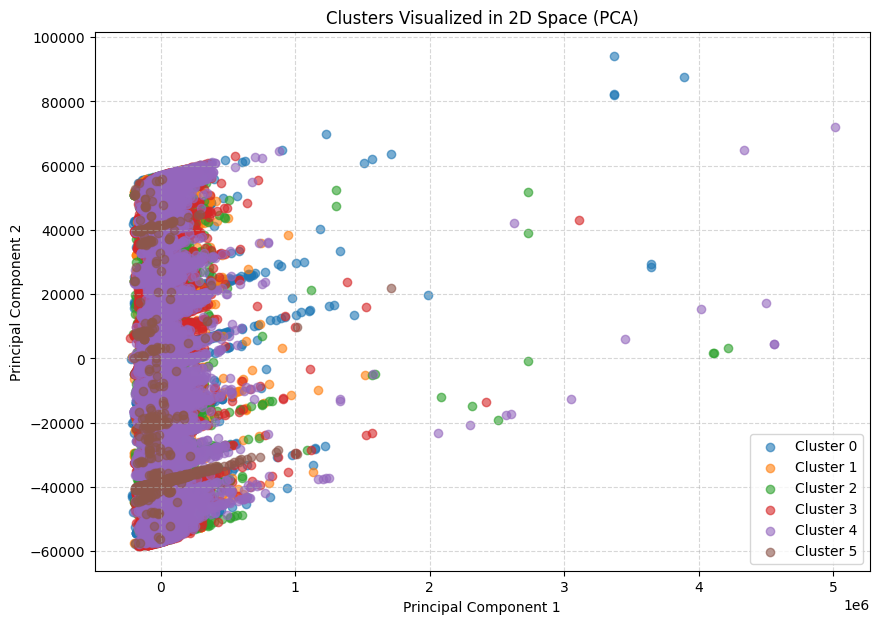

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select only numeric features for visualization
numeric_df = df_with_clusters.select_dtypes(include='number')

# Reduce to 2 components with PCA
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(numeric_df.drop(columns=['Cluster']))

# Create DataFrame for plotting
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df_with_clusters['Cluster']

# Plot clusters
plt.figure(figsize=(10, 7))
for cluster_id in sorted(pca_df['Cluster'].unique()):
    subset = pca_df[pca_df['Cluster'] == cluster_id]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster_id}', alpha=0.6)

plt.title('Clusters Visualized in 2D Space (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [13]:
# Save the clustered dataframe to CSV
output_path = r"C:\Users\surya\SPOTIFY-GENRE-CLUSTERING\src\dashboard\spotify_clusters.csv"
df_with_clusters.to_csv(output_path, index=False)

print(f"✅ Clustered data saved to: {output_path}")


✅ Clustered data saved to: C:\Users\surya\SPOTIFY-GENRE-CLUSTERING\src\dashboard\spotify_clusters.csv


In [14]:
import pandas as pd

# Load precomputed clustered data
csv_path = r"C:\Users\surya\SPOTIFY-GENRE-CLUSTERING\src\dashboard\spotify_clusters.csv"
df_clusters = pd.read_csv(csv_path)

# Optional: preview
print(df_clusters.head())
print(f"✅ Loaded {len(df_clusters)} tracks with clusters.")


   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


In [1]:
# streamlit_app.py (replace or insert this section in your existing app)
import streamlit as st
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# ---- Config ----
st.set_page_config(page_title="Spotify Clusters (Interactive PCA)", layout="wide")
DATA_PATH = r"C:\Users\surya\SPOTIFY-GENRE-CLUSTERING\src\dashboard\spotify_clusters.csv"
PCA_CACHE = r"C:\Users\surya\SPOTIFY-GENRE-CLUSTERING\src\dashboard\spotify_pca_cache.csv"

# ---- Load data ----
@st.cache_data
def load_data(path):
    df = pd.read_csv(path)
    return df

df = load_data(DATA_PATH)
st.sidebar.markdown("**Dataset loaded**")
st.sidebar.write(f"Tracks: {len(df):,}")

# ---- auto-detect column names ----
track_col = None
artist_col = None
for c in ['track_name','track','name','title']:
    if c in df.columns:
        track_col = c
        break
for c in ['artist_name','artists','artist']:
    if c in df.columns:
        artist_col = c
        break

# ---- select numeric features used for PCA (fallback list) ----
possible_features = ['danceability','energy','loudness','speechiness',
                     'acousticness','instrumentalness','liveness','valence','tempo','duration_ms','popularity']
features = [f for f in possible_features if f in df.columns]
if not features:
    st.error("No numeric audio features found in dataset. Check column names.")
    st.stop()

# ---- Filters in sidebar ----
st.sidebar.header("Filters")
clusters_available = sorted(df['Cluster'].unique())
selected_clusters = st.sidebar.multiselect("Clusters", clusters_available, default=clusters_available)

tempo_min = float(df['tempo'].min()) if 'tempo' in df.columns else 0.0
tempo_max = float(df['tempo'].max()) if 'tempo' in df.columns else 250.0
tempo_range = st.sidebar.slider("Tempo (BPM)", tempo_min, tempo_max, (tempo_min, tempo_max))

energy_min = float(df['energy'].min()) if 'energy' in df.columns else 0.0
energy_max = float(df['energy'].max()) if 'energy' in df.columns else 1.0
energy_range = st.sidebar.slider("Energy", energy_min, energy_max, (energy_min, energy_max))

dance_min = float(df['danceability'].min()) if 'danceability' in df.columns else 0.0
dance_max = float(df['danceability'].max()) if 'danceability' in df.columns else 1.0
dance_range = st.sidebar.slider("Danceability", dance_min, dance_max, (dance_min, dance_max))

# ---- apply filters ----
filtered = df[
    df['Cluster'].isin(selected_clusters) &
    (df['tempo'].between(tempo_range[0], tempo_range[1])) &
    (df['energy'].between(energy_range[0], energy_range[1])) &
    (df['danceability'].between(dance_range[0], dance_range[1]))
].reset_index(drop=True)

st.markdown(f"### Showing {len(filtered):,} tracks")

# ---- PCA (cache results to speed up) ----
def compute_and_cache_pca(df_in, features, cache_path):
    # If cache exists and matches length, use it
    if os.path.exists(cache_path):
        try:
            cache_df = pd.read_csv(cache_path)
            if len(cache_df) == len(df_in):
                return cache_df[['PC1','PC2']].values
        except Exception:
            pass

    X = df_in[features].fillna(0.0).values
    scaler = StandardScaler()
    Xs = scaler.fit_transform(X)
    pca = PCA(n_components=2, random_state=42)
    pcs = pca.fit_transform(Xs)
    cache_df = pd.DataFrame({'PC1': pcs[:,0], 'PC2': pcs[:,1]})
    # store index to ensure later alignment if needed
    cache_df.to_csv(cache_path, index=False)
    return pcs

pcs = compute_and_cache_pca(filtered, features, PCA_CACHE)
filtered['PC1'] = pcs[:,0]
filtered['PC2'] = pcs[:,1]

# ---- Plotly interactive scatter ----
st.subheader("Cluster PCA Scatter (interactive)")
hover_cols = [track_col] if track_col else []
if artist_col:
    hover_cols.append(artist_col)
# Add some numeric features to hover
hover_cols += [c for c in ['tempo','energy','danceability','valence','popularity'] if c in filtered.columns]

fig = px.scatter(
    filtered, x='PC1', y='PC2',
    color='Cluster',
    hover_data=hover_cols,
    title="PCA projection of tracks (click legend to toggle clusters)",
    width=1200, height=700,
    color_continuous_scale=px.colors.qualitative.Pastel
)

fig.update_traces(marker=dict(size=6, opacity=0.7), selector=dict(mode='markers'))
st.plotly_chart(fig, use_container_width=True)

# ---- show sample table for selected point(s) ----
st.subheader("Sample Tracks in Filtered Selection")
sample_n = st.slider("How many sample tracks to show", 3, 30, 8)
st.dataframe(filtered[[track_col, artist_col, 'Cluster'] + features].head(sample_n))



2025-08-15 11:01:23.169 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-15 11:01:23.258 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-08-15 11:01:23.262 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-08-15 11:01:23.265 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-15 11:01:25.190 
  command:

    streamlit run C:\Users\surya\SPOTIFY-GENRE-CLUSTERING\venv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-08-15 11:01:25.191 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-15 11:01:25.194 Thread 'MainThread': missing ScriptRunContext! This warning can be i

DeltaGenerator()